# Regressão Linear com Scikit-Learn

In [1]:
# Carregando o Dataset Boston Houses a partir do pacote sklearn
from sklearn.datasets import load_boston
boston = load_boston() 

Segue abaixo uma explicação dos dados da cidade de Boston:

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-residential acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per 10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. TARGET: Median value of owner-occupied homes in $1000's

In [2]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 

In [3]:
# Convertendo o dataset para um DataFrame com Pandas
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target

In [4]:
# Vamos conhecer seu conteúdo
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# Vamos explorar os dados de resultado
# Calculando a média da variável target
media_esperada = df['target'].mean()
media_esperada

22.532806324110677

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8C73B97B8>]], dtype=object)

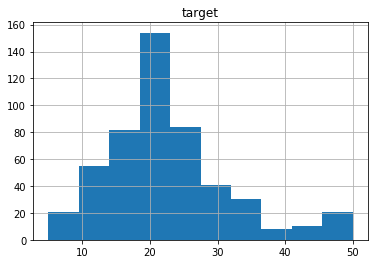

In [6]:
# Histograma do target
df.hist(column='target')

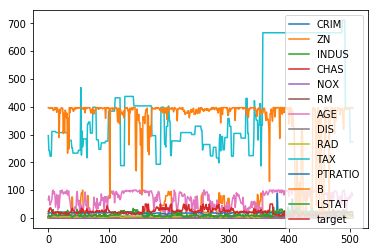

In [7]:
# Vamos plotar o DataFrame para ver se encontramos alguma correlação entre as variáveis que determinam o resultado
df.plot()

Não foi possível encontrar uma relação. Vamos tentar de outra forma

In [8]:
# Primeiro devemos separar as variáveis (X) do resultado (y)
X = df.iloc[:,:-1]
y = df['target'].values

In [9]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# Uma forma de escolher uma variável para fazer a correlação é utilizando o pacote statsmodel.
# Vamos agora calcular a covarância entre as variáveis
import statsmodels.regression.linear_model as sm
modelo_v1 = sm.OLS(y, X)
modelo_v2 = modelo_v1.fit()
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Sat, 12 May 2018   Prob (F-statistic):               0.00
Time:                        01:50:10   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0916      0.034     -2.675      0.008      -0.159      -0.024
ZN             0.0487      0.014      3.379      0.001       0.020       0.077
INDUS         -0.0038      0.064     -0.059      0.953      -0.130       0.123
CHAS           2.8564      0.904      3.160      0.002       1.080       4.633
NOX           -2.8808      3.359     -0.858      0.392      -9.481       3.720
RM             5.9252      0.309     19.168      0.000       5.318       6.533
AGE           -0.0072      0.014     -0.523      0.601      -0.034       0.020
DIS           -0.9680      0.196     -4.947      0.000      -1.352      -0.584
RAD            0.1704      0.067      2.554      0.011       0.039       0.302
TAX           -0.0094      0.004     -2.393      0.017      -0.017      -0.002
PTRATIO       -0.3924      0.110     -3.571      0.000      -0.608      -0.177
B              0.0150      0.003      5.561      0.000       0.010       0.020
LSTAT         -0.4170      0.051     -8.214      0.000      -0.517      -0.317
==============================================================================
Omnibus:                      204.050   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.527
Skew:                           1.609   Prob(JB):                    9.11e-299
Kurtosis:                      10.399   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Explicação dos dados acima:
    
- coef: The estimated value of the coefficient
- std err: The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.
- t: The t-statistic value. This is a measure of how statistically significant the coefficient is.
- P > |t|: P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
- [95.0% Conf. Interval]: The lower and upper values of the 95% confidence interval

Baseado no valor de (P>|t|) < 0.05, vemos que as variáveis RM, DIS, PTRATIO, B, LSTAT tem alta influência no resultado


Baseado em (t), vemos que o termo mais significante é RM 

In [11]:
# Gerando a matriz de correlação entre as variáveis
X = df.iloc[:,:-1]
matriz_corr = X.corr()
print (matriz_corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 

Não está fácil de ver a correlação na planilha acima. Vamos adicionar tudo em um gráfico com cor

In [12]:
# Criando uma função para plotar a correlação entre as variáveis
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = False, top = False, left = False, right = False) 
    plt.colorbar()
    plt.show()

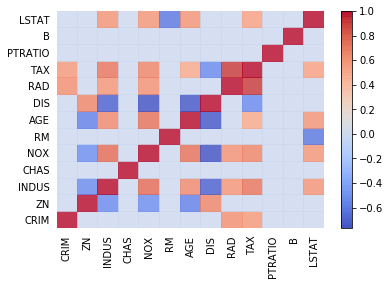

In [13]:
# Visualizando o Plot
# Gerando número de observações e variáveis
observations = len(df)
variables = df.columns[:-1]
visualize_correlation_matrix(X, hurdle = 0.5)

Vemos na tabela acima que as variáveis RM, B e PTRATIO não possui correlação com outras variáveis, de forma que podemos analisá-las em separado.  

Como RM tem a maior significância, vamos utilizá-la para tentar explicar a relação com o resultado em uma regressão linear simples

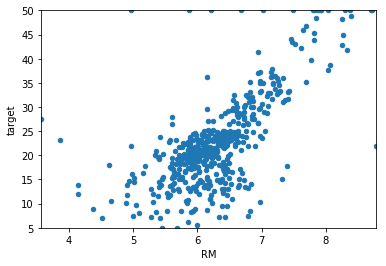

In [14]:
# Vamos agora imprimir um scatter plot entre RM e o resultado (target)
# Definindo o range dos valores de x e y
x_range = [df['RM'].min(), df['RM'].max()]
y_range = [df['target'].min(), df['target'].max()]
# Plot dos valores de x e y com a média
scatter_plot = df.plot(kind = 'scatter', x = 'RM', y = 'target', xlim = x_range, ylim = y_range)

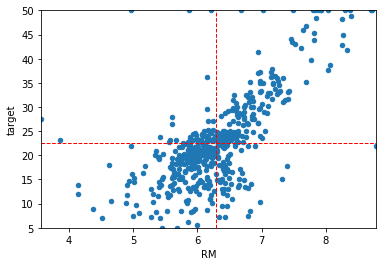

In [15]:
# Vamos adicionar ao gráfico o valor da média
scatter_plot = df.plot(kind = 'scatter', x = 'RM', y = 'target', xlim = x_range, ylim = y_range)
meanY = scatter_plot.plot(x_range, [df['target'].mean(),df['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([df['RM'].mean(), df['RM'].mean()], y_range, '--', color = 'red', linewidth = 1)

## Regressão Linear com o Scikit-Learn

In [16]:
# Importando a biblioteca
from sklearn import linear_model

In [17]:
# Cria o objeto
modelo = linear_model.LinearRegression(normalize = False, fit_intercept = True)

In [18]:
# Define os valores de x e y
num_observ = len(df)
X = df['RM'].values.reshape((num_observ, 1)) 
y = df['target'].values 

In [19]:
# Aplica o modelo - fit()
modelo.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# Imprime os coeficientes
print (modelo.coef_)
print (modelo.intercept_)

[ 9.10210898]
-34.6706207764


In [21]:
# Imprime as previsões
valores_previstos = modelo.predict(X)
valores_previstos

array([ 25.17574577,  23.77402099,  30.72803225,  29.02593787,
        30.38215211,  23.85593997,  20.05125842,  21.50759586,
        16.5833549 ,  19.97844155,  23.3735282 ,  20.02395209,
        18.93169901,  19.47782555,  20.81583557,  18.43108302,
        19.35039603,  19.85101202,  14.99048582,  17.45715736,
        16.02812625,  19.6234593 ,  21.23453259,  18.23993873,
        19.25027283,  16.29208741,  18.23993873,  20.36983223,
        24.44757706,  26.07685456,  17.32972783,  20.59738496,
        19.48692766,  17.22050253,  20.81583557,  19.33219181,
        18.49479778,  18.57671676,  19.63256141,  25.35778795,
        29.26259271,  26.95065703,  21.48028953,  21.86257811,
        20.57007863,  17.04756245,  17.99418179,  20.21509638,
        14.47166561,  16.31939374,  19.60525508,  20.98877564,
        24.5932108 ,  19.92382889,  18.9225969 ,  31.31056723,
        23.42814085,  27.36935404,  21.26183891,  19.27757916,
        17.58458688,  19.63256141,  24.09259481,  26.87

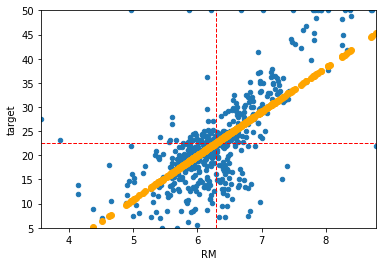

In [22]:
# Plotando a linha de regressão

# Primeira camada do Scatter Plot
scatter_plot = df.plot(kind = 'scatter', x = 'RM', y = 'target', xlim = x_range, ylim = y_range)

# Segunda camada do Scatter Plot (médias)
meanY = scatter_plot.plot(x_range, [df['target'].mean(),df['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([df['RM'].mean(),df['RM'].mean()], y_range, '--', color = 'red', linewidth = 1)

# Terceira camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(df['RM'], valores_previstos, 'o', color = 'orange', linewidth = 2)

Veja que a regressão linear não é perfeita perto dos dados reais, mas apenas uma aproximação.
Vamos ver mais adiante que existem formas estatísticas mais precisas para resolver esse e outros problemas  

## Exercício 4

Escolha outra variável do dataset para fazer uma regressão linear e plote o resultado

Salve o Jupyter com o nome 03_Regressao_Fulano